In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Visualize the Data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0].shape

(28, 28)

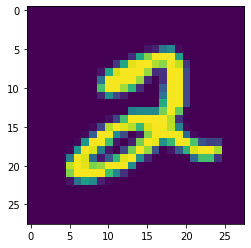

In [10]:
plt.imshow(x_train[5])

### Pre-Processing the Data

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

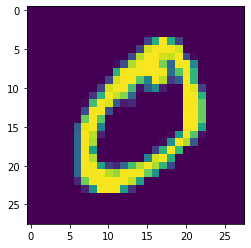

In [28]:
plt.imshow(x_train[1])

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train.shape

(60000,)

In [24]:
y_example = to_categorical(y_train)

In [25]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [26]:
y_example.shape

(60000, 10)

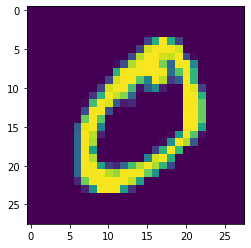

In [29]:
plt.imshow(x_train[1])

In [30]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [31]:
single_image = x_train[1]
single_image.max()

255

In [32]:
single_image.min()

0

In [33]:
x_test = x_test/255
x_train = x_train/255

In [35]:
scaled_img = x_train[0]

In [36]:
scaled_img.min()

0.0

In [37]:
scaled_img.max()

1.0

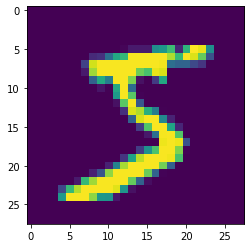

In [38]:
plt.imshow(scaled_img)

### Reshaping the data

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_test.shape

(10000, 28, 28)

In [46]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [47]:
x_test.shape

(10000, 28, 28, 1)

In [48]:
x_train.shape

(60000, 28, 28, 1)

### Training Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [52]:
model = Sequential()

In [54]:
model.add(
    Conv2D(
        filters=32,
        kernel_size=(4, 4),
        input_shape=(28, 28, 1),
        activation='relu'
))

model.add(
    MaxPool2D( pool_size=(2, 2) )
)

model.add(
    Flatten()
)

model.add(
    Dense(128, activation='relu')
)

model.add(
     Dense(10, activation='softmax')
)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Train the Model

In [57]:
model.fit(
    x_train,
    y_cat_train,
    epochs=10,
    validation_data=(x_test, y_cat_test),
    callbacks=[early_stop]
)

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.1373 - accuracy: 0.9592 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0420 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0425 - val_accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0363 - val_accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0526 -

### Evaluation

In [58]:
model.metrics_names

['loss', 'accuracy']

In [59]:
model.history.history

{'loss': [0.13733722269535065,
  0.04766065254807472,
  0.02990551106631756,
  0.02062719315290451,
  0.014469076879322529,
  0.010965810157358646,
  0.007941870018839836,
  0.007412903476506472,
  0.004132404457777739,
  0.004771409090608358],
 'accuracy': [0.9591666460037231,
  0.9854000210762024,
  0.9903500080108643,
  0.9935500025749207,
  0.9952666759490967,
  0.99631667137146,
  0.9975333213806152,
  0.9975000023841858,
  0.9987499713897705,
  0.99836665391922],
 'val_loss': [0.05845235660672188,
  0.05275336280465126,
  0.04204586520791054,
  0.042488399893045425,
  0.03625810146331787,
  0.0372953787446022,
  0.052576225250959396,
  0.04135849326848984,
  0.04692244902253151,
  0.05320806801319122],
 'val_accuracy': [0.9821000099182129,
  0.9836000204086304,
  0.9854000210762024,
  0.9858999848365784,
  0.9894999861717224,
  0.9890000224113464,
  0.9865000247955322,
  0.9883000254631042,
  0.9868000149726868,
  0.9883000254631042]}

In [60]:
losses = pd.DataFrame(model.history.history)

In [61]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.137337,0.959167,0.058452,0.9821
1,0.047661,0.985400,0.052753,0.9836
2,0.029906,0.990350,0.042046,0.9854
3,0.020627,0.993550,0.042488,0.9859
4,0.014469,0.995267,0.036258,0.9895
5,0.010966,0.996317,0.037295,0.9890
6,0.007942,0.997533,0.052576,0.9865
7,0.007413,0.997500,0.041358,0.9883
8,0.004132,0.998750,0.046922,0.9868
9,0.004771,0.998367,0.053208,0.9883


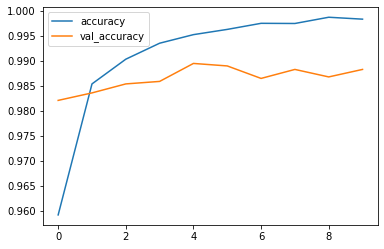

In [63]:
losses[['accuracy', 'val_accuracy']].plot()

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
predictions = model.predict(x_test).round()

In [69]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [72]:
print(classification_report(y_cat_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.99      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000



C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print(confusion_matrix(y_cat_test, predictions))

ValueError: multilabel-indicator is not supported

### Predicting an image

In [76]:
img = x_test[0]

In [78]:
x_test[0].shape

(28, 28, 1)

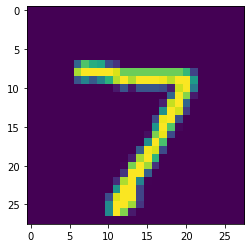

In [79]:
plt.imshow(img.reshape(28, 28))

In [82]:
model.predict(img.reshape(1, 28, 28, 1)).round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)